In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf 

In [10]:
# Tải dữ liệu đặc trưng
features_breath = pd.read_csv('F_Bth_Cleaned.csv').values
features_apnea = pd.read_csv('F_Stop_Bth_Cleaned.csv').values

# Tạo nhãn
labels_breath = np.zeros(features_breath.shape[0])
labels_apnea = np.ones(features_apnea.shape[0])

# Kết hợp dữ liệu
X = np.vstack([features_breath, features_apnea])
y = np.concatenate([labels_breath, labels_apnea])

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dữ liệu đã được chuẩn bị và chia thành tập huấn luyện và tập kiểm tra.")



Dữ liệu đã được chuẩn bị và chia thành tập huấn luyện và tập kiểm tra.


In [11]:
# Xây dựng mô hình
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sử dụng sigmoid cho phân loại nhị phân

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Mô hình đã được xây dựng và biên dịch.")

Mô hình đã được xây dựng và biên dịch.


c:\Users\MACH TRONG HAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,  
    verbose=1,             
    callbacks=[early_stopping]  
)

print("Huấn luyện mô hình hoàn tất.")


Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7560 - loss: 0.5415 - val_accuracy: 0.8759 - val_loss: 0.2949
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8776 - loss: 0.3030 - val_accuracy: 0.9087 - val_loss: 0.2283
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9048 - loss: 0.2393 - val_accuracy: 0.9133 - val_loss: 0.1952
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9188 - loss: 0.2036 - val_accuracy: 0.9133 - val_loss: 0.1825
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9131 - loss: 0.2050 - val_accuracy: 0.9204 - val_loss: 0.1760
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9250 - loss: 0.1902 - val_accuracy: 0.9204 - val_loss: 0.1730
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9345 - loss: 0.1780 - val_accuracy: 0.9274 - val_loss: 0.1578
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9332 - loss: 0.1734 - va

In [13]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Độ chính xác của mô hình trên tập kiểm tra: {accuracy*100:.2f}%')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9288 - loss: 0.1747
Độ chính xác của mô hình trên tập kiểm tra: 92.40%


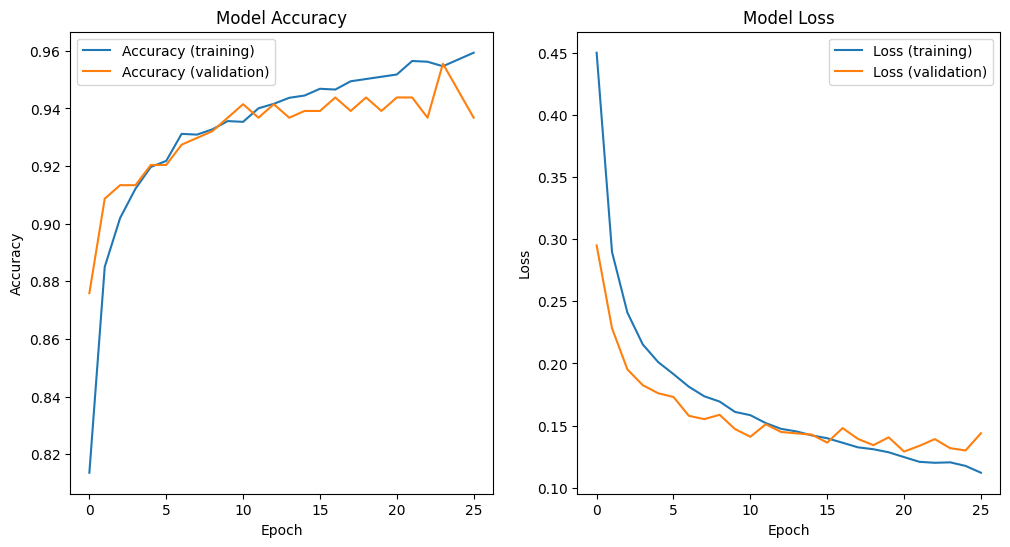

In [14]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [15]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# model.save('gesture_model.tflite')
with open('gesture_model.tflite', 'wb') as f:
    f.write(tflite_model)

def python_to_c_array(array_name, data, columns=4):
    """
    Convert a 1D Python array to a C array initialization code with specified number of columns.
    
    Args:
        array_name (str): Name of the C array variable.
        data (list): List containing the data elements.
        columns (int): Number of columns to use in the C array initialization code.
    
    Returns:
        str: C code for initializing the array.
    """
    c_code = f"float {array_name}[{len(data)}] = {{\n"
    for i in range(0, len(data), columns):
        row_data = ", ".join([f"{val:.3f}" for val in data[i:i+columns]])
        c_code += f"    {row_data},\n"
    c_code += "};\n"
    return c_code


# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)


# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

# Write TFLite model to a C source (or header) file
c_model_name = 'gesture_model'
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

INFO:tensorflow:Assets written to: C:\Users\MACHTR~1\AppData\Local\Temp\tmpihv0ncsq\assets


INFO:tensorflow:Assets written to: C:\Users\MACHTR~1\AppData\Local\Temp\tmpihv0ncsq\assets


Saved artifact at 'C:\Users\MACHTR~1\AppData\Local\Temp\tmpihv0ncsq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 24), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2354935297232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935295696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935290128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935298192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935297040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935298960: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: C:\Users\MACHTR~1\AppData\Local\Temp\tmpg0hm6u3y\assets


INFO:tensorflow:Assets written to: C:\Users\MACHTR~1\AppData\Local\Temp\tmpg0hm6u3y\assets


Saved artifact at 'C:\Users\MACHTR~1\AppData\Local\Temp\tmpg0hm6u3y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 24), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2354935297232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935295696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935290128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935298192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935297040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2354935298960: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model is 16908 bytes
